In [1]:
%matplotlib inline
import os
import matplotlib
import matplotlib as mpl
from scipy import stats
import numpy as np
import pandas as pd
# !pip install cometml_api
from cometml_api import api
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
sns.set_palette("colorblind")
sns.set_style("whitegrid")
sns.set()
sns.set(font_scale=1.5)
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [2]:
trhic = 'f5ffcac825df402c991de3e3f1d5b676'
trhic2 = '5f73e98e01bd406696f4c6938360914b'
trhic3 ='fa53a63863c54742b1b0b4781cf3a2cb'
trhick = '00da10d890544e0ab9772815cd2ac5cc'
trhic4dataset = '9b404f6fe26d48babe789e03105b87a3'
trhic_3inv = '80413958ea574d8b9f7587270dd33695'
experiment_id = trhic4dataset
metric_name = 'trace/H1Cte'

In [3]:

os.makedirs("plots/", exist_ok=True)
experiments = api.get_experiments(experiment_id)
metric_names = api.get_metrics(experiments[0]["experiment_key"]).keys()

In [4]:
# param

In [5]:
# metric.keys()

In [6]:
def make_df(metric, param):
    df = pd.DataFrame({})
    for name in metric.keys():
        df[name] = metric[name]['value']
        df['step'] = metric[name]['step']
    for name in param.keys():
        df[name] = param[name]
    df['model'] = param['model']
    df['ratio_lr_bs'] = float(param['lr'])/float(param['batch_size'])
    df['ratio_bs_ds'] = float(param['batch_size'])/float(param['dataset_size'])
    df['lr'] = float(param['lr'])
    df['batch_size'] = float(param['batch_size'])
    df['dataset_size'] = float(param['dataset_size'])
    return df


In [7]:
# df = make_df(metric, param)
all_df = [make_df(api.get_metrics(experiments[i]["experiment_key"]), api.get_params(experiments[i]["experiment_key"])) for i in range(len(experiments))]

In [8]:
df = pd.concat(all_df)
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set_style("whitegrid")

/Users/valentin/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
df.keys()

Index(['batch_size', 'corrupt', 'cuda', 'dataset', 'dataset_size',
       'estim_size', 'fisher_rao/te', 'fisher_rao/tr', 'hidden_size',
       'loss/gap', 'loss/te', 'loss/tr', 'lr', 'mode', 'model', 'momentum',
       'ratio/trace_C_o_Fte', 'ratio/trace_C_o_Ftr', 'ratio/trace_C_o_Hte',
       'ratio/trace_C_o_Htr', 'ratio/trace_HC_o_HHte', 'ratio/trace_HC_o_HHtr',
       'ratio_bs_ds', 'ratio_lr_bs', 'rcond', 'sensitivity/te',
       'sensitivity/tr', 'sim_frob/Cte_Ctr', 'sim_frob/Cte_Fte',
       'sim_frob/Cte_Hte', 'sim_frob/Ctr_Ftr', 'sim_frob/Ctr_Htr',
       'sim_frob/Fte_Ftr', 'sim_frob/Fte_Hte', 'sim_frob/Ftr_Htr',
       'sim_frob/Hte_Htr', 'step', 'test_size', 'trace/CCte', 'trace/CCtr',
       'trace/Cte', 'trace/Ctr', 'trace/F1Cte', 'trace/F1Ctr', 'trace/FFte',
       'trace/FFtr', 'trace/Fte', 'trace/Ftr', 'trace/H1Cte', 'trace/H1Ctr',
       'trace/HCte', 'trace/HCtr', 'trace/HHte', 'trace/HHtr', 'trace/Hte',
       'trace/Htr', 'unsim_L2/Cte_Fte', 'unsim_L2/Cte_Hte', 'u

In [10]:
ax = sns.scatterplot(data=df.loc[df['model'] != 'ogreg'], x='trace/H1Cte_1e-06', y='loss/gap', hue='dataset', style='model')
# sns.jointplot(data=df, x='trace/H1Cte', y='lo0ss/gap', kind='hex')
# sns.regplot(data=df,  x='trace/H1Cte', y='loss/gap', robust=True, ci=None, truncate=True)
# sns.lmplot(data=df,  x='trace/H1Cte', y='loss/gap', col='model', robust=True, height=10, hue='dataset')
# sns.lineplot(data=df, x=metric_namex, y=metric_namey, hue='model') 
# plt.xlim([-.6, 35])
plt.plot(np.arange(100), np.arange(100))
# plt.ylim([-.6, 35])
# plt.ylim([-.1, .75])
plt.yscale('symlog')
plt.xscale('symlog')
# plt.grid('on')
ax.tick_params(axis='x',which='minor',bottom='on')
ax.tick_params(axis='y',which='minor',bottom='on')

ValueError: Could not interpret input 'trace/H1Cte_1e-06'

In [11]:
# fig = plt.figure(figsize=(25, 20))
# sns.jointplot(x=metric_namex, y=metric_namey, data=df, kind="kde")
# plt.show()
# g = (sns.jointplot(x=metric_namex, y=metric_namey, data=df, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

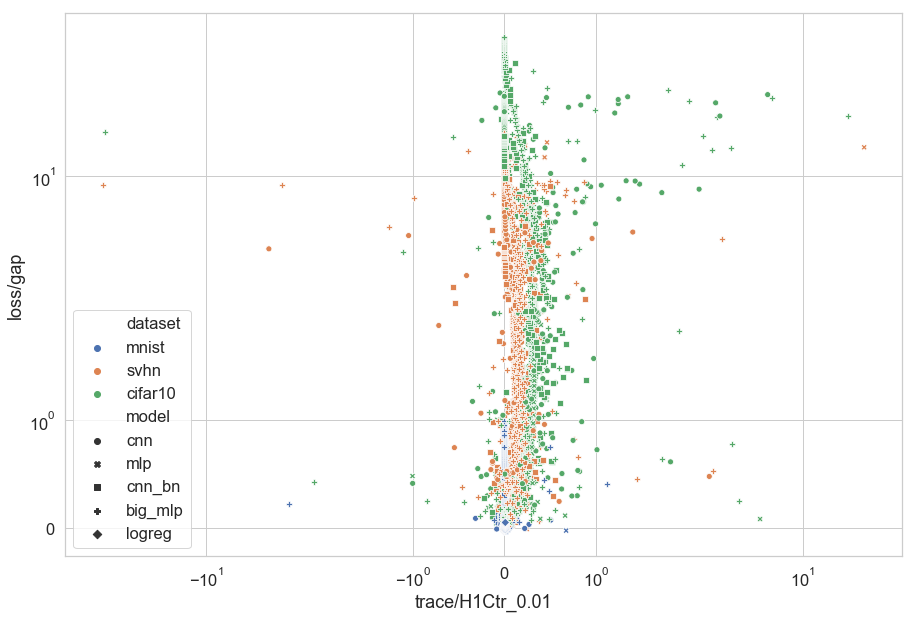

In [12]:
sns.scatterplot(data=df.loc[df['model'] != 'ogreg'], x='trace/H1Ctr_0.01', y='loss/gap', style='model', hue='dataset')
plt.xscale('symlog')
plt.yscale('symlog')

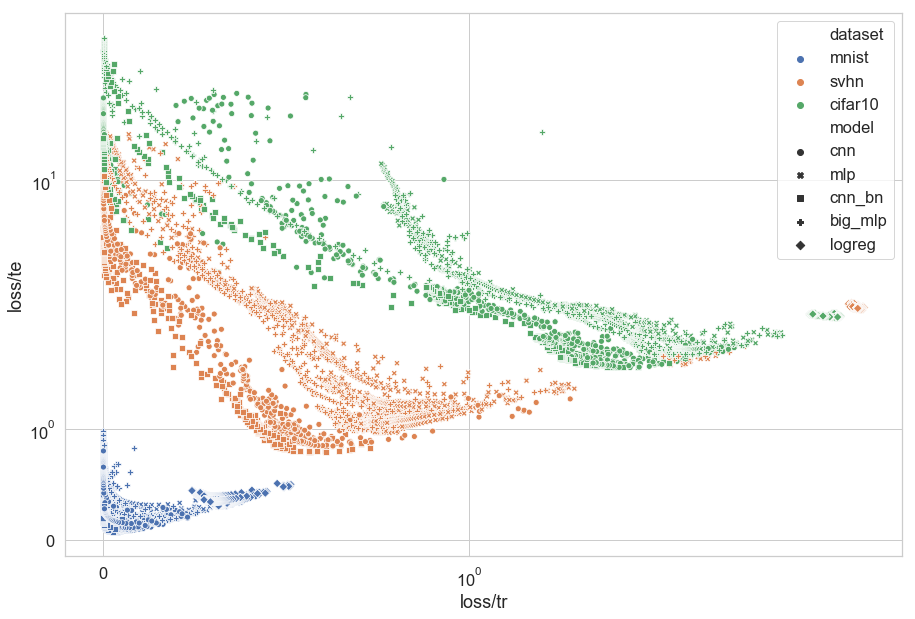

In [13]:
sns.scatterplot(data=df, y='loss/te', x='loss/tr', style='model', hue='dataset')
plt.xscale('symlog')
plt.yscale('symlog')
# plt.xlim([0, .6])
# plt.ylim([0,.6])

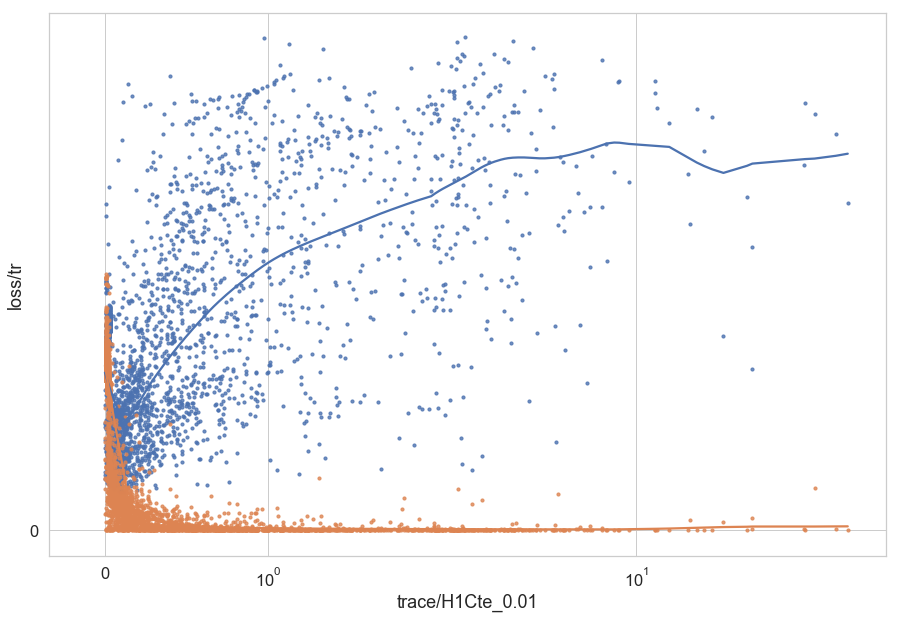

In [14]:
# sns.scatterplot(data=df.loc[df['dataset'] == 'mnist'], y='loss/te', x='trace/H1Cte', hue='model')
df_mnist = df.loc[df['dataset'] == 'mnist' ]
sns.regplot(data=df_mnist.loc[df_mnist['trace/H1Cte_0.01'] > 0], y='loss/te', x='trace/H1Cte_0.01', lowess=True, scatter_kws={"s": 10})
sns.regplot(data=df_mnist.loc[df_mnist['trace/H1Cte_0.01'] > 0], y='loss/tr', x='trace/H1Cte_0.01', lowess=True, scatter_kws={"s": 10})
# plt.xlim([-2, 4])
plt.xscale('symlog')
plt.yscale('symlog')

In [15]:
# sns.scatterplot(data=df, y='loss/te', x='ratio/trace_C_o_Hte', hue='model')
# plt.ylim([.05, .45])

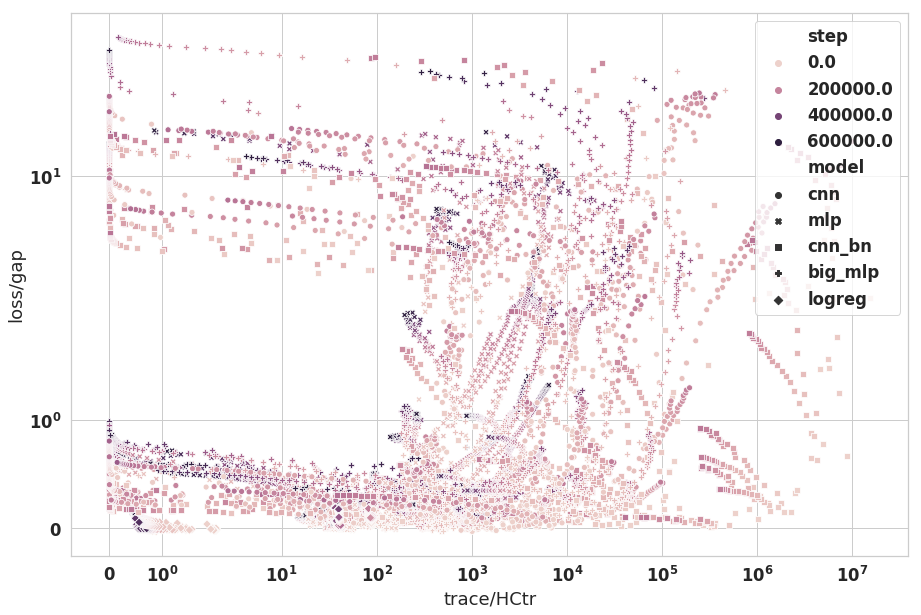

In [44]:
sns.scatterplot(data=df.loc[df['dataset'] != 'cifar1'] , x='trace/HCtr', y='loss/gap', hue='step', style='model')
# plt.xscale('symlog')
# plt.yscale('symlog')
plt.xscale('symlog')
plt.yscale('symlog')

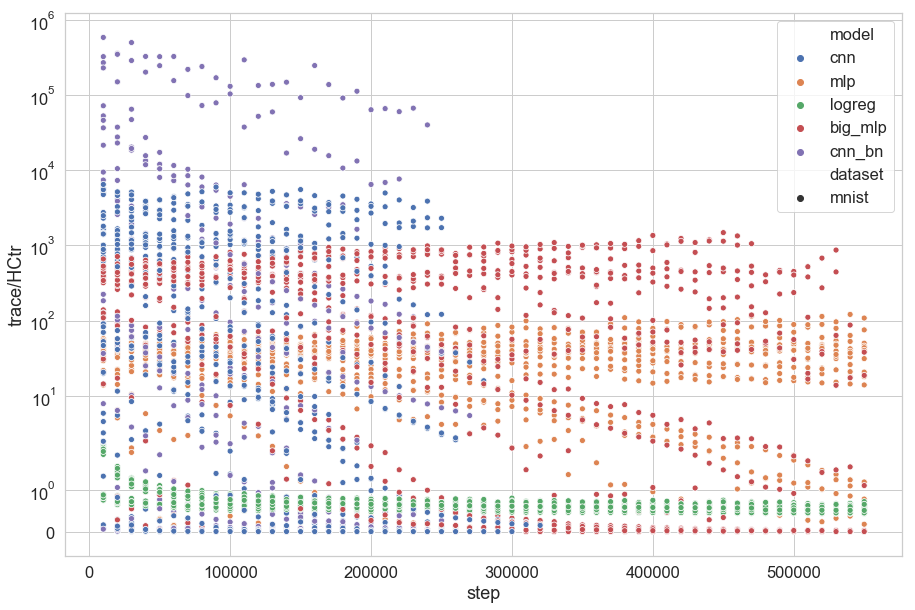

In [17]:
sns.scatterplot(data=df.loc[df['dataset'] == 'mnist'] , y='trace/HCtr', x='step', hue='model', style='dataset')
plt.yscale('symlog')

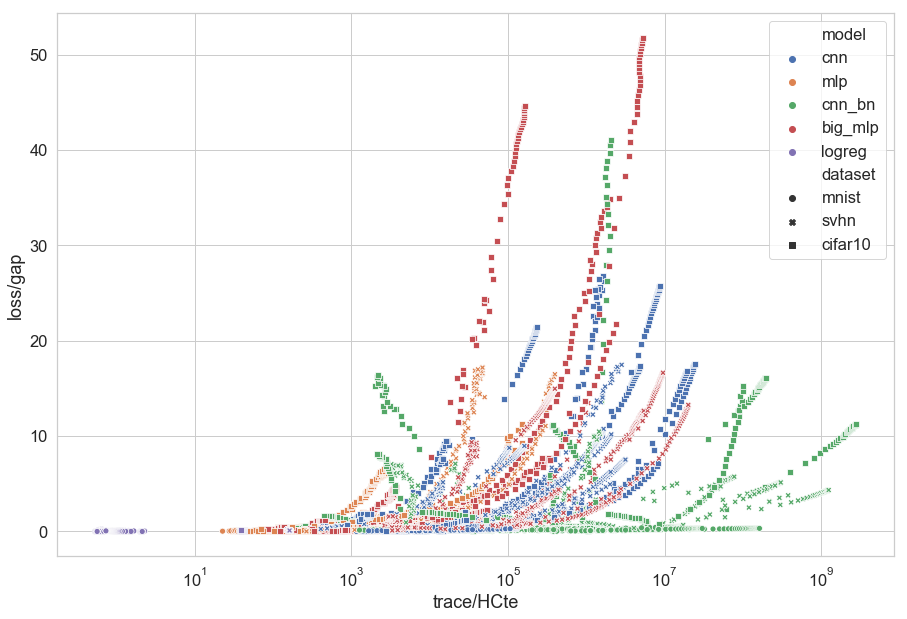

In [18]:
sns.scatterplot(data=df.loc[df['dataset'] != 'mist'] , x='trace/HCte', y='loss/gap', hue='model', style='dataset')
plt.xscale('log')

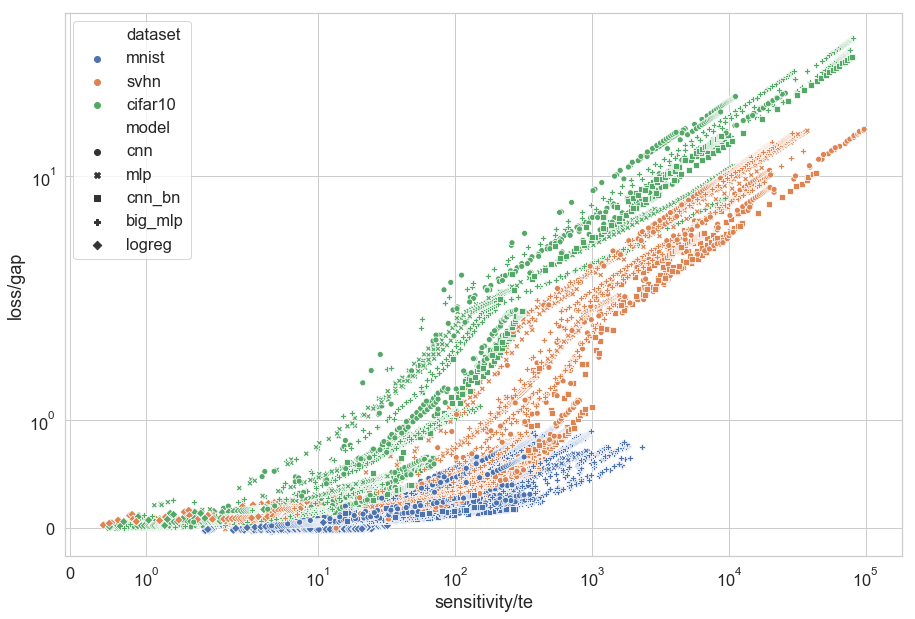

In [19]:
sns.scatterplot(data=df.loc[df['dataset'] != 'mist'] , x='sensitivity/te', y='loss/gap', hue='dataset', style='model')
plt.xscale('symlog')
plt.yscale('symlog')

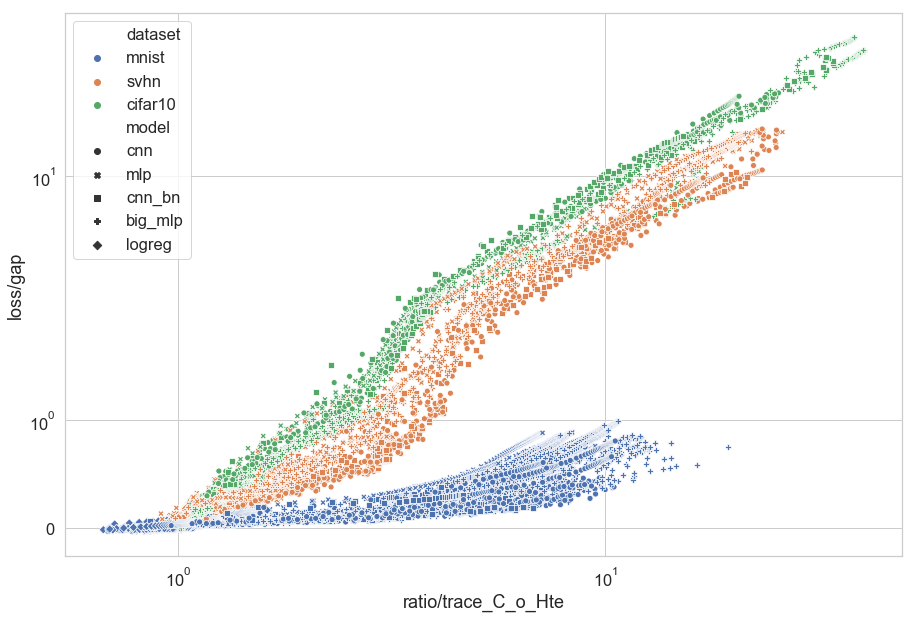

In [20]:
sns.scatterplot(data=df.loc[df['dataset'] != 'cifar1'] , x='ratio/trace_C_o_Hte', y='loss/gap', hue='dataset', style='model')
plt.xscale('symlog')
plt.yscale('symlog')

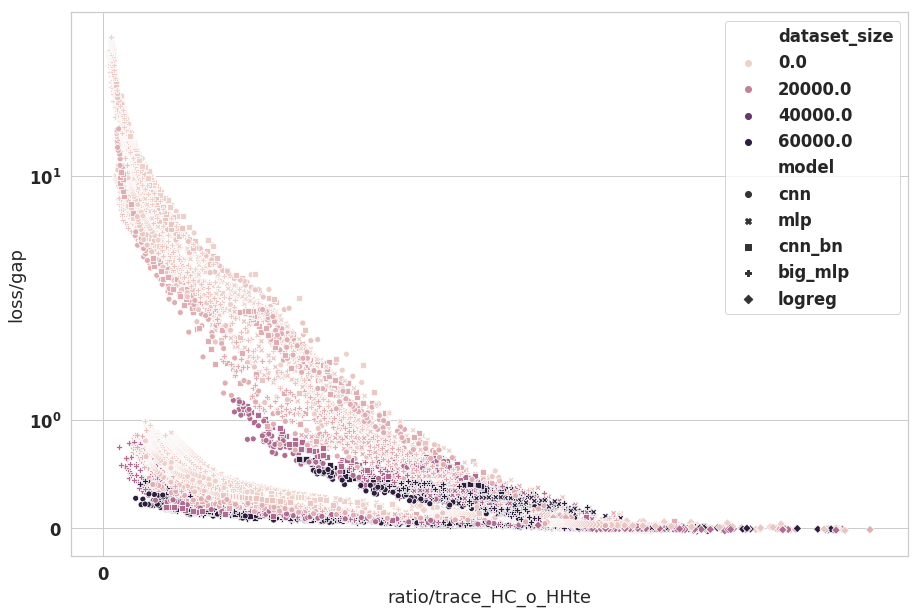

In [57]:
sns.scatterplot(data=df.loc[df['dataset'] != 'cifar1'] , x='ratio/trace_HC_o_HHte', y='loss/gap', hue='dataset_size', style='model')
plt.xscale('symlog')
plt.yscale('symlog')

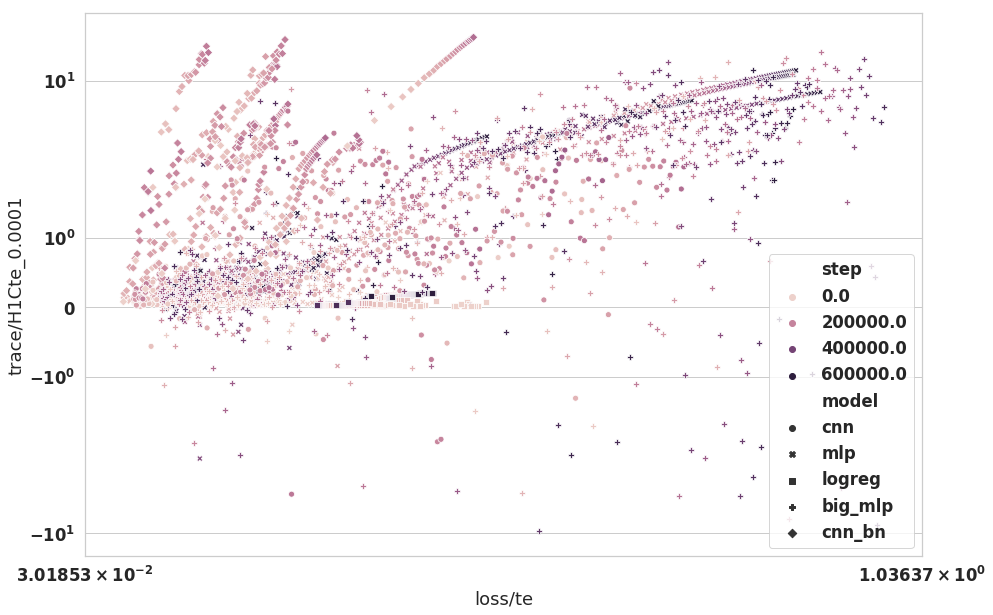

In [84]:
# df2 = df.loc[']
# print(pd.DataFrame(df2))
sns.scatterplot(data=df_mnist, y='trace/H1Cte_0.0001', x='loss/te', style='model', hue='step')
plt.yscale('symlog')
plt.xscale('symlog')

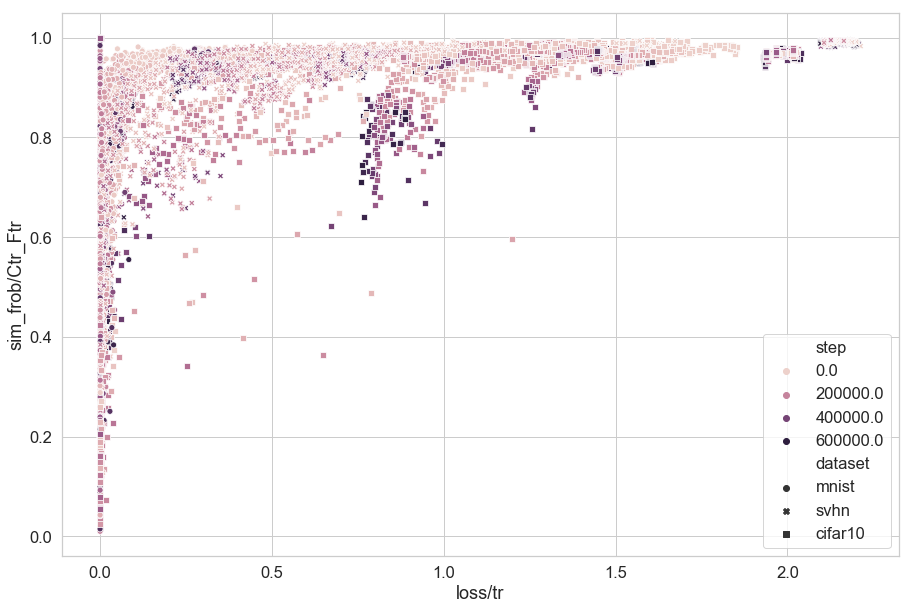

In [22]:
sns.scatterplot(data=df, y='sim_frob/Ctr_Ftr', x='loss/tr', style='dataset', hue='step')
# plt.yscale('symlog')
# plt.xscale('symlog')

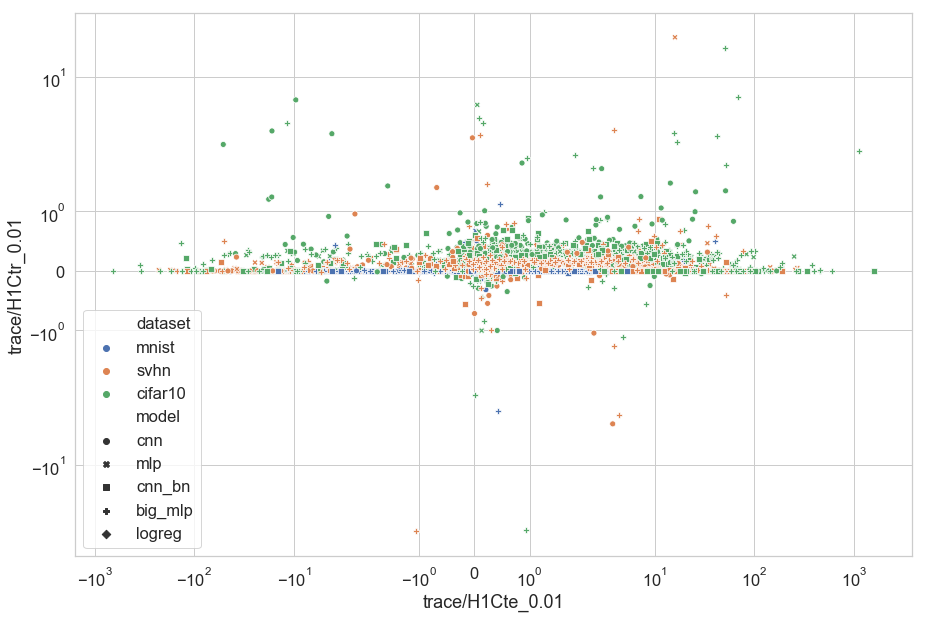

In [23]:
sns.scatterplot(data=df, x='trace/H1Cte_0.01', y='trace/H1Ctr_0.01', hue='dataset', style='model')
plt.xscale('symlog')
plt.yscale('symlog')

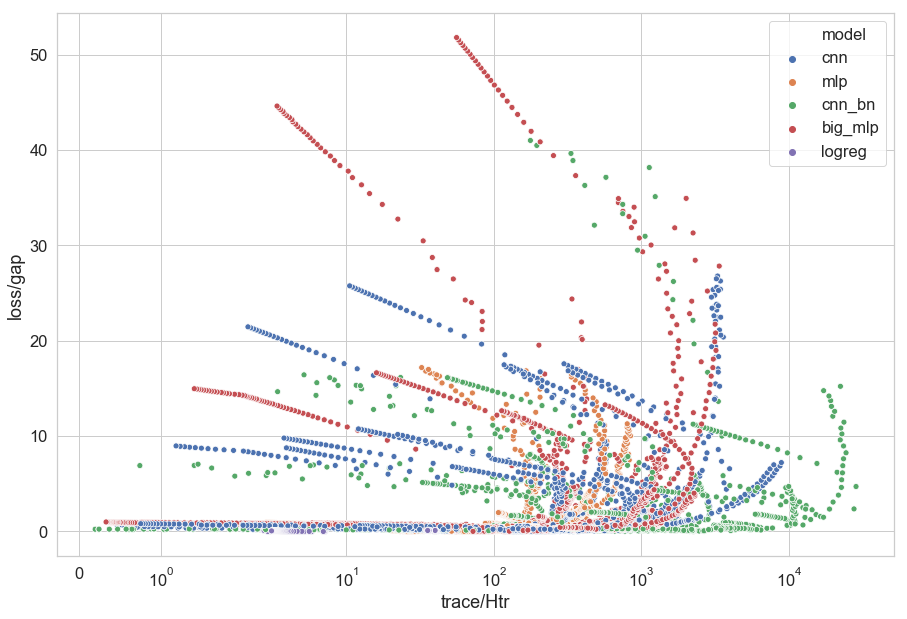

In [24]:
sns.scatterplot(data=df, x='trace/Htr', y='loss/gap', hue='model')
plt.xscale('symlog')

In [25]:

#     #sns.scatterplot(np.array(metric[metric_namex]['value'], np.array(metric[metric_namex]['value'])
# #     metricsx.append(
# #     metricsy.append(
# # dfx = metricsx[0]
# # for dfx_ in metricsx[1:]:
# #     dfx = dfx.append(dfx_)
# # dfy = metricsy[0]
# # for dfy_ in metricsy[1:]:
# #     dfy = dfy.append(dfy_)
# # ipdb.set_trace()
# #if metric_name is not 'ess_0':
#     #metric_name += env_name

# for metric_name in metric_names:
#     fig = plt.figure()
#     for i in range(len(experiments)):
#         ipdb.set_trace()
#         param = api.get_params(experiments[i]["experiment_key"])
#         metric = api.get_metrics(experiments[i]["experiment_key"])
#         try:
#             sns.lineplot(x="step", y="value", data=metric[metric_name])
#         except:
#             pass
#     fig.savefig(f"./plots/{metric_name.replace('/', '_')}.png")
#     plt.close('all')
#     print(f'Done {metric_name}')


# # df = metrics[0]
# # for df_ in metrics[1:]:
# #     df = df.append(df_)
# #
# # df['category'] = df[param_names].apply(lambda x: '-'.join(x), axis=1).astype(str)
# # for group in param_names:
# #     os.makedirs("plots/" + plot_name + '/' + env_name + '/' + group, exist_ok=True)
# #
# #     for subgroup in set(df[group]):
# #         df_sub = df.loc[df[group] == subgroup]
# #         df_sub = df_sub.reset_index()
# #         sns.lineplot(x="step", y="value", hue="category", data=df_sub)
# #         plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# #         plt.savefig('plots/' + plot_name + '/' + env_name + '/' + group + '/' + subgroup + '.pdf', bbox_inches='tight')
# #         plt.close()


In [26]:
df.keys()

Index(['batch_size', 'cuda', 'dataset', 'dataset_size', 'estim_size',
       'loss/gap', 'loss/te', 'loss/tr', 'lr', 'mode', 'model', 'momentum',
       'ratio/trace_C_o_Hte', 'ratio/trace_C_o_Htr', 'ratio/trace_HC_o_HHte',
       'ratio/trace_HC_o_HHtr', 'ratio_bs_ds', 'ratio_lr_bs', 'rcond',
       'sensitivity/te', 'sensitivity/tr', 'sim_frob/Cte_Ctr',
       'sim_frob/Cte_Fte', 'sim_frob/Cte_Hte', 'sim_frob/Ctr_Ftr',
       'sim_frob/Ctr_Htr', 'sim_frob/Fte_Ftr', 'sim_frob/Fte_Hte',
       'sim_frob/Ftr_Htr', 'sim_frob/Hte_Htr', 'step', 'trace/CCte',
       'trace/CCtr', 'trace/Cte', 'trace/Ctr', 'trace/FFte', 'trace/FFtr',
       'trace/Fte', 'trace/Ftr', 'trace/H1Cte', 'trace/H1Cte_0.0001',
       'trace/H1Cte_0.01', 'trace/H1Cte_0.1', 'trace/H1Cte_1.0',
       'trace/H1Cte_1e-06', 'trace/H1Ctr', 'trace/H1Ctr_0.0001',
       'trace/H1Ctr_0.01', 'trace/H1Ctr_0.1', 'trace/H1Ctr_1.0',
       'trace/H1Ctr_1e-06', 'trace/HCte', 'trace/HCtr', 'trace/HHte',
       'trace/HHtr', 'trace/H

In [27]:
df.loc[df['dataset'] == 'mnist']

,batch_size,cuda,dataset,dataset_size,estim_size,loss/gap,loss/te,loss/tr,lr,mode,...,trace/Hte,trace/Htr,unsim_L2/Cte_Fte,unsim_L2/Cte_Hte,unsim_L2/Ctr_Cte,unsim_L2/Ctr_Ftr,unsim_L2/Ctr_Htr,unsim_L2/Fte_Hte,unsim_L2/Ftr_Htr,unsim_L2/Htr_Hte
0,64.0,true,mnist,2500.0,5000,0.432233,0.433809,0.001576,0.010,lstsq,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,64.0,true,mnist,2500.0,5000,0.253726,0.324939,0.071213,0.010,lstsq,...,32.452282,24.025826,52.138042,46.044487,126.839859,1.844395e+01,10.432971,3.677340,3.579204,7.396113
1,64.0,true,mnist,2500.0,5000,0.386513,0.411754,0.025241,0.010,lstsq,...,34.496944,17.792227,242.545715,231.531189,458.989746,1.191307e+01,10.592523,7.678978,3.946718,19.664373
2,64.0,true,mnist,2500.0,5000,0.467858,0.480358,0.012500,0.010,lstsq,...,35.116821,12.818053,486.018768,467.335114,808.787537,1.137254e+01,7.644023,6.633864,3.604257,31.701605
3,64.0,true,mnist,2500.0,5000,0.519529,0.527197,0.007668,0.010,lstsq,...,36.032772,9.877106,724.950256,683.974792,1113.079468,5.550084e+00,5.641037,7.251002,2.819622,42.425850
4,64.0,true,mnist,2500.0,5000,0.556806,0.561845,0.005039,0.010,lstsq,...,35.802094,7.394902,938.889404,882.695251,1366.192505,8.103606e+00,3.445366,11.351718,4.424083,48.882187
5,64.0,true,mnist,2500.0,5000,0.588670,0.592381,0.003711,0.010,lstsq,...,35.881462,6.032800,1065.888062,1064.103394,1597.854980,7.502947e+00,2.436548,15.873078,7.598890,52.936462
6,64.0,true,mnist,2500.0,5000,0.613028,0.615911,0.002883,0.010,lstsq,...,36.784477,5.063652,1226.419189,1211.457031,1799.789429,2.461573e+00,1.809137,11.064415,2.544003,60.902046
7,64.0,true,mnist,2500.0,5000,0.633106,0.635448,0.002342,0.010,lstsq,...,36.832417,4.338100,1392.050171,1346.456787,1964.247681,4.858978e+00,1.354287,13.129865,4.255333,62.987068
8,64.0,true,mnist,2500.0,5000,0.650858,0.652810,0.001952,0.010,lstsq,...,37.525551,3.764819,1466.881592,1462.737549,2121.274902,6.122482e-01,1.055083,12.159436,1.146042,68.047707


In [28]:


sns.set(font_scale=1.5)
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
# matplotlib.style.use('ggplot')
# plt.style.use('seaborn-colorblind')

sns.set_style("whitegrid")
# sns.set_palette("colorblind")

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

/Users/valentin/anaconda/envs/pytorch/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


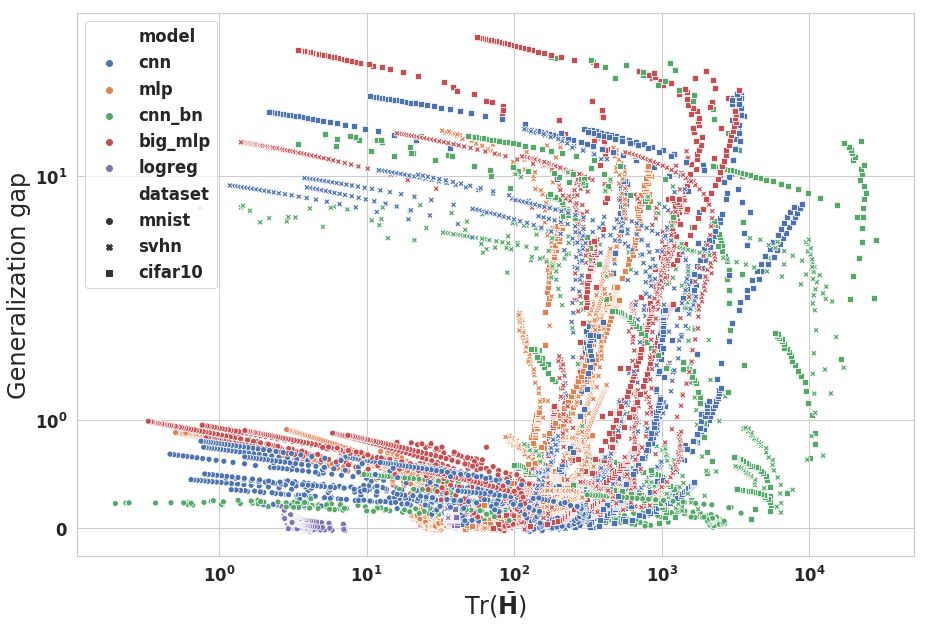

In [29]:
fig = plt.figure()

sns.scatterplot(data=df, x='trace/Htr', y='loss/gap', hue='model', style='dataset')

plt.xlabel(r'Tr($\bar{\mathbf{H}})$', fontsize=24)
plt.ylabel('Generalization gap', fontsize=24)
plt.xscale('log')
plt.yscale('symlog')
# fig.savefig('gap_trhtr.pdf', bbox_inches='tight')
# plt.close()

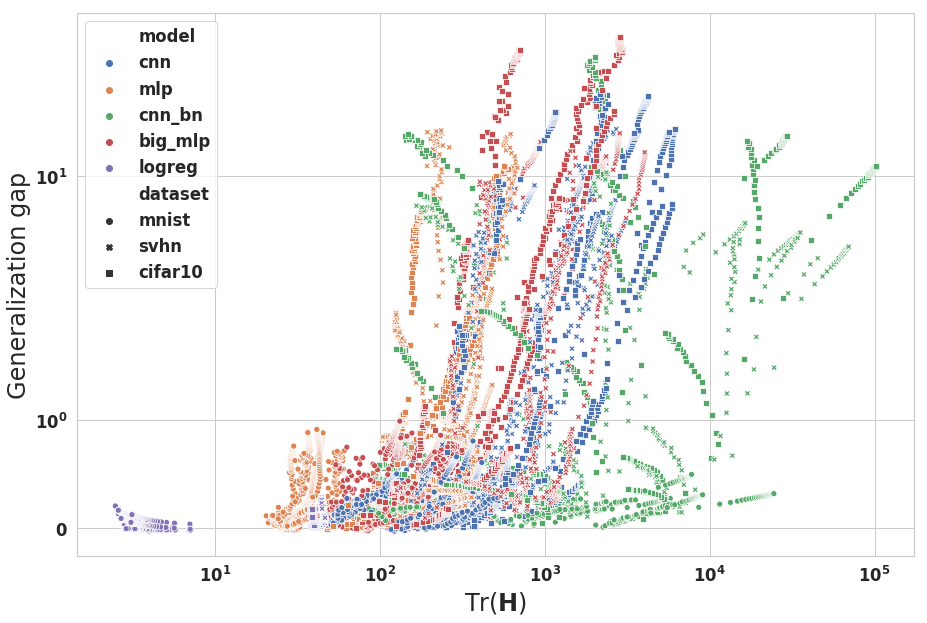

In [30]:
fig = plt.figure()

sns.scatterplot(data=df, x='trace/Hte', y='loss/gap', hue='model', style='dataset')

plt.xlabel(r'Tr(${\mathbf{H}})$', fontsize=24)
plt.ylabel('Generalization gap', fontsize=24)
plt.xscale('log')
plt.yscale('symlog')
# fig.savefig('gap_trhte.pdf', bbox_inches='tight')
# plt.close()

Text(0, 0.5, 'Generalization gap')

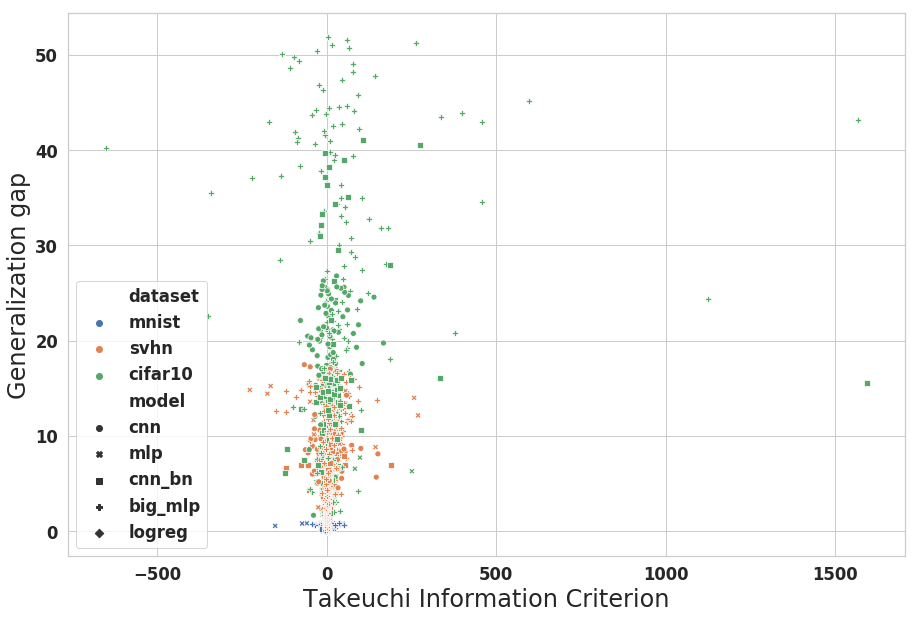

In [31]:
fig = plt.figure()

sns.scatterplot(data=df.loc[df['model'] != 'loggreg'], x='trace/H1Cte_0.01', y='loss/gap', hue='dataset', style='model')
# sns.scatterplot(data=df, x='trace/H1Cte', y='loss/gap', kind='kde')
# plt.plot(np.linspace(-.1, .6, 100), np.linspace(-.1, .6, 100), 'k--')

plt.xlabel(r'Takeuchi Information Criterion', fontsize=24)
plt.ylabel('Generalization gap', fontsize=24)
# plt.xlim([-.3, 1.25])
# plt.xscale('log')
# plt.yscale('log')
# fig.savefig('gap_trh1cte.pdf', bbox_inches='tight')
# plt.close()


Text(0, 0.5, 'Empirical Takeuchi Information Criterion')

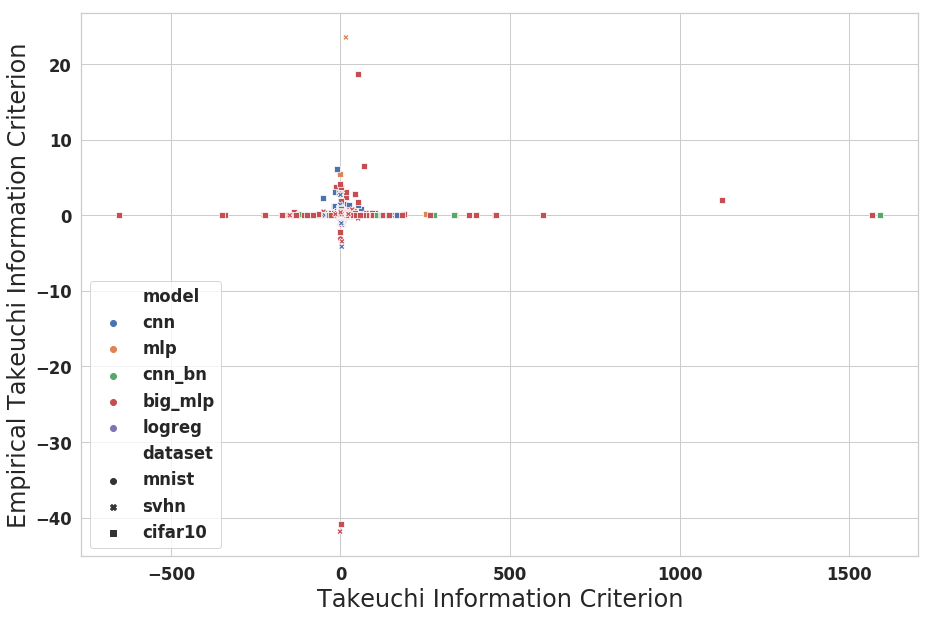

In [32]:
fig = plt.figure()
sns.scatterplot(data=df, x='trace/H1Cte_0.01', y='trace/H1Ctr_0.01', hue='model', style='dataset')
plt.xlabel(r'Takeuchi Information Criterion', fontsize=24)
plt.ylabel('Empirical Takeuchi Information Criterion', fontsize=24)
# plt.xlim([-.3, 1.23])
# fig.savefig('gap_trh1cte.pdf', bbox_inches='tight')

In [33]:
fig = plt.figure()
sns.scatterplot(data=df, x='trace/H1Ctr_1e-10', y='loss/gap', hue='model', style='dataset')
plt.xlabel(r'Takeuchi Information Criterion', fontsize=24)
plt.xlim([-0.025, .125])
plt.ylabel('Generalization gap', fontsize=24)
# fig.savefig('gap_trh1ctr.pdf', bbox_inches='tight')

ValueError: Could not interpret input 'trace/H1Ctr_1e-10'

<Figure size 1080x720 with 0 Axes>

In [ ]:
fig = plt.figure()
df_mnist = df.loc[df['dataset'] == 'svhn' ]
sns.regplot(data=df_mnist.loc[df_mnist['trace/H1Cte_0.01'] > 0], y='loss/te', x='trace/H1Cte_0.01', lowess=True, scatter_kws={"s": 10}, label='Test')
sns.regplot(data=df_mnist.loc[df_mnist['trace/H1Cte_0.01'] > 0], y='loss/tr', x='trace/H1Cte_0.01', lowess=True, scatter_kws={"s": 10}, label='Train')
plt.xlabel(r'Takeuchi Information Criterion', fontsize=24)
plt.ylabel('Generalization gap', fontsize=24)
# plt.xscale('log')
plt.legend(loc='best')
# fig.savefig('overfitting_NN_mnist.pdf', bbox_inches='tight')

In [ ]:
fig = plt.figure()
df_mnist = df.loc[df['dataset'] == 'mnist' ]
sns.regplot(data=df_mnist.loc[df_mnist['trace/H1Ctr_0.01'] > 0], y='loss/te', x='trace/H1Ctr_0.01', lowess=True, scatter_kws={"s": 10}, label='Test')
sns.regplot(data=df_mnist.loc[df_mnist['trace/H1Ctr_0.01'] > 0], y='loss/tr', x='trace/H1Ctr_0.01', lowess=True, scatter_kws={"s": 10}, label='Train')
plt.xlabel(r'Takeuchi Information Criterion', fontsize=24)
plt.ylabel('Generalization gap', fontsize=24)
plt.legend()
# plt.xlim([-.005, 0.04])
# fig.savefig('overiftting_NN_mnist.pdf', bbox_inches='tight')

In [ ]:
# f, ax = plt.subplots(figsize=(12, 12))
# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
# sns.kdeplot(data=df, x='trace/H1Cte', y='loss/gap')

In [ ]:
df['ngap'] = df['loss/gap']*df['dataset_size']

In [ ]:
df['ntrhicte'] = df['trace/H1Cte_0.01']*df['dataset_size']

In [ ]:
axes = sns.scatterplot(data=df.loc[df['dataset'] != 'cifar1'], x='ntrhicte', y='ngap', hue='model', style='dataset')
plt.plot(np.arange(5000), np.arange(5000), 'k--')
plt.xlim([-1000, 25000])
plt.ylim([-1000, 25000])

In [ ]:
# sns.kdeplot(np.array(df['ntrhicte']), np.array(df['ngap']))
# f, ax = plt.subplots(figsize=(6, 6))
fig = plt.figure()
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
xlab = 'trace/H1Cte_0.01'
ylab = 'loss/gap'
h = sns.jointplot(x=xlab, y=ylab, data=df.loc[df['model'] != 'logreg'], kind='kde', cmap='viridis', n_levels=30, shade=True, height=15, xlim=(-0.1, 100), ylim=(-0.1, 10), cbar=True, ratio=10)
h.ax_joint.set_xlabel(r'Tr($\mathbf{H}^{-1} \mathbf{C}$)', fontsize='26')
h.ax_joint.set_ylabel(r'Generalization gap', fontsize='26')
# h.savefig(f'density_gap_ticte.pdf')
# xlab = 'ntrhicte'
# ylab = 'ngap'
# sns.jointplot(x=xlab, y=ylab, data=df.loc[df['model'] != 'logreg'], kind='kde', cmap='inferno', n_levels=15, shade=True, height=15, xlim=(-200, 5000), ylim=(-200, 5000))

In [ ]:
X = np.array(df['trace/H1Cte'])[1000:1300]
y = np.array(df['loss/gap'])[1000:1300]
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
kernel = 1 * RBF(length_scale=1) + 1.0 * WhiteKernel()

In [ ]:
df['cloud'] = df['trace/H1Cte_0.01']*df['lr']/(2*df['batch_size'])

In [ ]:
fig = plt.figure()
sns.scatterplot(data=df, x='cloud', y='loss/gap', hue='dataset', style='dataset')
plt.xlabel(r'Takeuchi Information Criterion', fontsize=24)
# plt.xlim([-0.000005, .00010])
# plt.xscale('log')
plt.ylabel('Generalization gap', fontsize=24)
plt.xscale('symlog')
plt.yscale('symlog')
# fig.savefig('gap_trh1ctr.pdf', bbox_inches='tight')

In [ ]:
my_df = df.loc[(df['dataset'] == 'cifar10') & (df['model'] == 'cnn') & (df['ratio_lr_bs'] == 0.001/64) & (df['dataset_size'] == 2500)]

In [ ]:
sns.lineplot(data=my_df, y='loss/tr', x='step')